<a href="https://colab.research.google.com/github/junyoung-jang/MNIST_Classsification/blob/main/ML4ME_termproject_using_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## 필요한 라이브러리 import
import numpy as np
import pandas as pd
import PIL
import matplotlib.pyplot as plt
import sys

In [ ]:
data = pd.read_csv('/content/sample_data/mnist_train_small.csv')
data = np.array(data)
Y_train = data[:7000,0]
X_train = data[:7000,1:]/255
Y_valid = data[7000:,0]
X_valid = data[7000:,1:]/255

Y_test = pd.read_csv('/content/drive/MyDrive/label.csv', header=None, index_col=None)


In [ ]:
import os
## PIL로 이미지 불러오고 데이터 Stack
folder_path = '/content/drive/MyDrive/train'
image_list = []
for i in range(100):
    # 파일 경로 생성
    file_path = os.path.join(folder_path, f"{i}.png")
    image = np.array(PIL.Image.open(file_path)) /255.
    image_list.append(image)

## (28, 140)>(28,28) 5개로 분할
sliced_images = []

for image in image_list:
    slices = [image[:, i:i+28] for i in range(0, 140, 28)]
    sliced_images.append(slices)

for i, slices in enumerate(sliced_images):
    print(f"Image {i+1}:")
    for j, slice_i in enumerate(slices):
        print(f"  Slice {j+1}:")



Image 1:
  Slice 1:
  Slice 2:
  Slice 3:
  Slice 4:
  Slice 5:
Image 2:
  Slice 1:
  Slice 2:
  Slice 3:
  Slice 4:
  Slice 5:
Image 3:
  Slice 1:
  Slice 2:
  Slice 3:
  Slice 4:
  Slice 5:
Image 4:
  Slice 1:
  Slice 2:
  Slice 3:
  Slice 4:
  Slice 5:
Image 5:
  Slice 1:
  Slice 2:
  Slice 3:
  Slice 4:
  Slice 5:
Image 6:
  Slice 1:
  Slice 2:
  Slice 3:
  Slice 4:
  Slice 5:
Image 7:
  Slice 1:
  Slice 2:
  Slice 3:
  Slice 4:
  Slice 5:
Image 8:
  Slice 1:
  Slice 2:
  Slice 3:
  Slice 4:
  Slice 5:
Image 9:
  Slice 1:
  Slice 2:
  Slice 3:
  Slice 4:
  Slice 5:
Image 10:
  Slice 1:
  Slice 2:
  Slice 3:
  Slice 4:
  Slice 5:
Image 11:
  Slice 1:
  Slice 2:
  Slice 3:
  Slice 4:
  Slice 5:
Image 12:
  Slice 1:
  Slice 2:
  Slice 3:
  Slice 4:
  Slice 5:
Image 13:
  Slice 1:
  Slice 2:
  Slice 3:
  Slice 4:
  Slice 5:
Image 14:
  Slice 1:
  Slice 2:
  Slice 3:
  Slice 4:
  Slice 5:
Image 15:
  Slice 1:
  Slice 2:
  Slice 3:
  Slice 4:
  Slice 5:
Image 16:
  Slice 1:
  Slice 2:
  

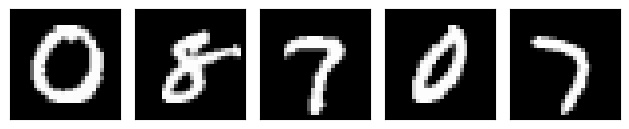

In [ ]:
## 이미지 분할 여부 확인
fig, ax = plt.subplots(nrows=1, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(5):
  img = sliced_images[0][i].reshape(28, 28)
  ax[i].imshow(img,cmap='gray',)
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()

In [ ]:
def sigmoid(z):
  return 1.0/(1 + np.exp(-z))

def relu(z):
  return np.maximum(0.0, z)

def onehot(y, n_classes):
  # Encode labels into one-hot representation
  # y: labels [n_samples]
  # n_classes: number of classes
  # return onehot: [n_samples, n_classlabels]

  n_samples = y.shape[0]
  y_onehot = np.zeros((n_samples, n_classes))
  for i in range(y.shape[0]):
    y_onehot[i, y[i]] = 1

  return y_onehot

def forward(X, w_h, b_h, w_h2, b_h2, w_out, b_out):
  # step 1: net input of hidden layer, z_h [n_samples, n_hidden]
  # step 2: activation of hidden layer, a_h [n_samples, n_hidden]
  # step 3: net input of output layer, z_out [n_samples, n_classlabels]
  # step 4: activation output layer, a_out [n_samples, n_classlabels]

  z_h = np.matmul(X, w_h) + b_h.T
  a_h = sigmoid(z_h)
  z_h2 = np.matmul(a_h, w_h2) + b_h2.T
  a_h2 = sigmoid(z_h2)
  z_out = np.matmul(a_h2, w_out) + b_out.T
  a_out = sigmoid(z_out)
  return z_h, a_h, z_h2, a_h2, z_out, a_out

def compute_cost(y_onehot, output, l2, w_h, w_h2, w_out):
  # Compute cost function
  # y_onehot: one-hot encoded output [n_samples, n_classlabels]
  # output: activation output, a_out [n_samples, n_classlabels]
  # l2: regularization coefficient lambda
  # w_h, w_out: current weight for hidden and output layers
  # return cost: cost value with l2 reguralization

  m = y_onehot.shape[0]

  cost1 = - np.sum(y_onehot * np.log(output) + (1.-y_onehot) * np.log(1.0-output))
  l2_term = np.sum(w_h**2.) + np.sum(w_out**2.) + np.sum(w_h2 **2.)
  cost = cost1 + l2*l2_term

  return cost

def predict(X, w_h, b_h, w_h2, b_h2, w_out, b_out):
  # predict class labels
  # X: input array [n_samples, n_features]
  # y_pred: prediced class labels [n_samples]

  a_out = forward(X, w_h, b_h, w_h2, b_h2, w_out, b_out)[-1]
  y_pred = np.argmax(a_out, axis=1)

  return y_pred

def train(X_train, Y_train, X_valid, Y_valid, n_hidden=30, n_hidden2=20, eta=0.0001, n_iter=100, minibatch_size=1, l2=0):
  # Learn weights from training data
  # X_train: input array [n_samples, n_features]
  # Y_train: target class labels [n_samples]
  # n_hidden: number of units in hidden layer
  # eta: learning rate
  # n_iter: max number of iterations
  # minibatch_size: number of minibatch
  # l2: regularization coefficient lambda
  # return learned weights

  # 1. Initialize the wegiths
  np.random.seed(500)

  n_classes = np.max(Y_train)+1
  n_feature = X_train.shape[1]

  b_h = np.zeros(n_hidden)
  b_h2 = np.zeros(n_hidden2)
  b_out = np.zeros(n_classes)
  w_h = np.random.randn(n_feature, n_hidden)
  w_h2 = np.random.randn(n_hidden, n_hidden2)
  w_out = np.random.randn(n_hidden2, n_classes)
  cost_best = 1e+8
  w_h_best = np.random.randn(n_feature, n_hidden)
  w_h2_best = np.random.randn(n_hidden, n_hidden2)
  w_out_best = np.random.randn(n_hidden2, n_classes)
  b_h_best = np.zeros(n_hidden)
  b_h2_best = np.zeros(n_hidden2)
  b_out_best = np.zeros(n_classes)

  # 2. One-hot encoding of Y_train
  y_onehot = onehot(Y_train, n_classes)
  y_valid_onehot = onehot(Y_valid, n_classes)

  # 3. Do iterations
  for i in range(n_iter):

    idx = np.arange(X_train.shape[0])

    # 4. Do iterations for minibatch
    for start_idx in range(0, X_train.shape[0]-minibatch_size+1, minibatch_size):

      batch_idx = idx[start_idx:start_idx+minibatch_size]
      X_train_batch = X_train[batch_idx]

      # 5. Forward X_train_batch
      z_h, a_h, z_h2, a_h2, z_out, a_out = forward(X_train_batch, w_h, b_h, w_h2, b_h2, w_out, b_out)

      # 6. Set delta_out and grad_w_out, grad_b_out
      delta_out = a_out - y_onehot[batch_idx]
      grad_w_out = np.matmul(a_h2.T, delta_out) + l2*w_out
      grad_b_out = np.sum(delta_out, axis=0)

      # 6.1 Deltah2, Grad_w_h2, grad_b_h2 설정
      delta_h2 = np.matmul(delta_out, w_out.T) * (a_h2) * (1. - a_h2)
      grad_w_h2 = np.dot(a_h.T, delta_h2)
      grad_b_h2 = np.sum(delta_h2, axis=0)

      # 7. Set delta_h and grad_w_h, grad_b_h
      delta_h = np.matmul(delta_h2, w_h2.T) * (a_h) * (1. - a_h)
      grad_w_h = np.dot(X_train[batch_idx].T, delta_h)
      grad_b_h = np.sum(delta_h, axis=0)


      # 8. Update weights: w_h, b_h, w_out, b_out
      b_h -= eta*grad_b_h
      w_h -= eta*grad_w_h
      b_h2 -= eta * grad_b_h2
      w_h2 -= eta * grad_w_h2
      b_out -= eta*grad_b_out
      w_out -= eta*grad_w_out


    # 9. Get a_out
    a_out = forward(X_train, w_h, b_h, w_h2, b_h2, w_out, b_out)[-1]
    a_out_val = forward(X_valid, w_h, b_h, w_h2, b_h2, w_out, b_out)[-1]

    # 10. Compute cost
    cost = compute_cost(y_onehot, a_out, l2, w_h, w_h2, w_out)


    # 11. Predict y_train_pred
    y_train_pred = predict(X_train, w_h, b_h, w_h2, b_h2, w_out, b_out)
    y_valid_pred = predict(X_valid, w_h, b_h, w_h2, b_h2, w_out, b_out)

    # 12. Check the training results
    train_acc = ((np.sum(Y_train == y_train_pred)).astype(float) / X_train.shape[0])

    # 13. Check the validation results: validation accuracy(valid_acc) and validation cost(valid_cost)
    ## initialize cost_best
    valid_cost = compute_cost(y_valid_onehot, a_out_val, l2, w_h, w_h2, w_out)
    valid_acc = ((np.sum(Y_valid == y_valid_pred)).astype(float) / X_valid.shape[0])



    # 14. Update the weight if the current cost is smaller than the saved one
    if cost_best>valid_cost:
      cost_best = valid_cost
      w_h_best = w_h
      w_h2_best = w_h2
      b_h_best = b_h
      b_h2_best = b_h2
      w_out_best = w_out
      b_out_best = b_out


    sys.stderr.write('%d/%d | Train Cost: %.2f | Acc.: %.2f%% ' %(i+1, n_iter, cost, train_acc*100))
    sys.stderr.write('| Validation Cost: %.2f | Acc.: %.2f%% \n' %(valid_cost, valid_acc*100))
    sys.stderr.flush()

  return w_h_best, b_h_best, w_h2_best, b_h2_best, w_out_best, b_out_best

In [ ]:
## rotating, flip할 데이터 로드
from PIL import Image
test = X_train[0].reshape(28, 28)
test2 = Image.fromarray(test)
flip_img= test2.transpose(Image.TRANSVERSE)
rotation_X_train_5deg = X_train[:1000]
rotation_Y_train_5deg = Y_train[:1000]
rotation_X_train_m5deg = X_train[2000:2500]
rotation_Y_train_m5deg = Y_train[2000:2500]
rotation_X_train_10deg = X_train[1000:2000]
rotation_Y_train_10deg = Y_train[1000:2000]
rotation_X_train_m10deg = X_train[2500:3000]
rotation_Y_train_m10deg = Y_train[2500:3000]

In [ ]:
temp_rotation_5deg = []
for i in range(len(rotation_X_train_5deg)):
    img_array = rotation_X_train_5deg[i].reshape(28, 28)
    img = Image.fromarray(img_array)
    rotated_img = img.rotate(5)
    temp_rotation_5deg.append(rotated_img)
    temp_rotation_5deg[i]=np.array(temp_rotation_5deg[i])
    temp_rotation_5deg[i]=temp_rotation_5deg[i].flatten()

temp_rotation_m5deg = []
for i in range(len(rotation_X_train_m5deg)):
    img_array = rotation_X_train_m5deg[i].reshape(28, 28)
    img = Image.fromarray(img_array)
    rotated_img = img.rotate(-5)
    temp_rotation_m5deg.append(rotated_img)
    temp_rotation_m5deg[i]=np.array(temp_rotation_m5deg[i])
    temp_rotation_m5deg[i]=temp_rotation_m5deg[i].flatten()

temp_rotation_10deg = []
for i in range(len(rotation_X_train_10deg)):
    img_array = rotation_X_train_10deg[i].reshape(28, 28)
    img = Image.fromarray(img_array)
    rotated_img = img.rotate(10)
    temp_rotation_10deg.append(rotated_img)
    temp_rotation_10deg[i]=np.array(temp_rotation_10deg[i])
    temp_rotation_10deg[i]=temp_rotation_10deg[i].flatten()

temp_rotation_m10deg = []
for i in range(len(rotation_X_train_m10deg)):
    img_array = rotation_X_train_m10deg[i].reshape(28, 28)
    img = Image.fromarray(img_array)
    rotated_img = img.rotate(-10)
    temp_rotation_m10deg.append(rotated_img)
    temp_rotation_m10deg[i]=np.array(temp_rotation_m10deg[i])
    temp_rotation_m10deg[i]=temp_rotation_m10deg[i].flatten()

In [ ]:
X_train_concated = X_train.copy()
Y_train_concated = Y_train.copy()
for i in range(len(rotation_X_train_5deg)):
  X_train_concated = np.append(X_train_concated, [rotation_X_train_5deg[i]], axis=0)
  Y_train_concated = np.append(Y_train_concated, [rotation_Y_train_5deg[i]])
  print(X_train_concated.shape)

for i in range(len(rotation_X_train_m5deg)):
  X_train_concated = np.append(X_train_concated, [rotation_X_train_m5deg[i]], axis=0)
  Y_train_concated = np.append(Y_train_concated, [rotation_Y_train_m5deg[i]])
  print(X_train_concated.shape)

for i in range(len(rotation_X_train_10deg)):
  X_train_concated = np.append(X_train_concated, [rotation_X_train_10deg[i]], axis=0)
  Y_train_concated = np.append(Y_train_concated, [rotation_Y_train_10deg[i]])
  print(X_train_concated.shape)

for i in range(len(rotation_X_train_m10deg)):
  X_train_concated = np.append(X_train_concated, [rotation_X_train_m10deg[i]], axis=0)
  Y_train_concated = np.append(Y_train_concated, [rotation_Y_train_m10deg[i]])
  print(X_train_concated.shape)

(7001, 784)
(7002, 784)
(7003, 784)
(7004, 784)
(7005, 784)
(7006, 784)
(7007, 784)
(7008, 784)
(7009, 784)
(7010, 784)
(7011, 784)
(7012, 784)
(7013, 784)
(7014, 784)
(7015, 784)
(7016, 784)
(7017, 784)
(7018, 784)
(7019, 784)
(7020, 784)
(7021, 784)
(7022, 784)
(7023, 784)
(7024, 784)
(7025, 784)
(7026, 784)
(7027, 784)
(7028, 784)
(7029, 784)
(7030, 784)
(7031, 784)
(7032, 784)
(7033, 784)
(7034, 784)
(7035, 784)
(7036, 784)
(7037, 784)
(7038, 784)
(7039, 784)
(7040, 784)
(7041, 784)
(7042, 784)
(7043, 784)
(7044, 784)
(7045, 784)
(7046, 784)
(7047, 784)
(7048, 784)
(7049, 784)
(7050, 784)
(7051, 784)
(7052, 784)
(7053, 784)
(7054, 784)
(7055, 784)
(7056, 784)
(7057, 784)
(7058, 784)
(7059, 784)
(7060, 784)
(7061, 784)
(7062, 784)
(7063, 784)
(7064, 784)
(7065, 784)
(7066, 784)
(7067, 784)
(7068, 784)
(7069, 784)
(7070, 784)
(7071, 784)
(7072, 784)
(7073, 784)
(7074, 784)
(7075, 784)
(7076, 784)
(7077, 784)
(7078, 784)
(7079, 784)
(7080, 784)
(7081, 784)
(7082, 784)
(7083, 784)
(708

In [ ]:
n = np.arange(1, 9500)
print(n)
random_idx = np.random.choice(n, 500, replace='False')
print(len(random_idx))

[   1    2    3 ... 9497 9498 9499]
500


In [ ]:
'''
X_train_concated = np.delete(X_train_concated, random_idx , axis = 0)
Y_train_concated = np.delete(Y_train_concated, random_idx , axis = 0)
'''

'\nX_train_concated = np.delete(X_train_concated, random_idx , axis = 0)\nY_train_concated = np.delete(Y_train_concated, random_idx , axis = 0)\n'

In [ ]:
  w_h, b_h, w_h2, b_h2, w_out, b_out = train(X_train_concated, Y_train_concated, X_valid, Y_valid, n_hidden=250, n_hidden2=150, eta=0.001, n_iter=200, minibatch_size=500, l2=0.0003)

1/200 | Train Cost: 30319.46 | Acc.: 45.07% | Validation Cost: 40054.90 | Acc.: 45.04% 
2/200 | Train Cost: 22074.31 | Acc.: 59.86% | Validation Cost: 30100.86 | Acc.: 58.72% 
3/200 | Train Cost: 18411.76 | Acc.: 67.52% | Validation Cost: 25891.88 | Acc.: 64.96% 
4/200 | Train Cost: 16195.75 | Acc.: 72.31% | Validation Cost: 23415.00 | Acc.: 68.71% 
5/200 | Train Cost: 14654.31 | Acc.: 75.67% | Validation Cost: 21712.80 | Acc.: 71.53% 
6/200 | Train Cost: 13479.81 | Acc.: 78.09% | Validation Cost: 20429.60 | Acc.: 73.51% 
7/200 | Train Cost: 12542.98 | Acc.: 80.17% | Validation Cost: 19417.66 | Acc.: 75.05% 
8/200 | Train Cost: 11772.45 | Acc.: 81.93% | Validation Cost: 18596.44 | Acc.: 76.30% 
9/200 | Train Cost: 11120.68 | Acc.: 83.27% | Validation Cost: 17912.85 | Acc.: 77.24% 
10/200 | Train Cost: 10556.36 | Acc.: 84.23% | Validation Cost: 17331.40 | Acc.: 78.20% 
11/200 | Train Cost: 10058.90 | Acc.: 85.01% | Validation Cost: 16828.16 | Acc.: 78.84% 
12/200 | Train Cost: 9614.38 |

In [ ]:
 ## 예측

# 데이터를 모델에 입력하고 합치기
outputs = []
for i in range(len(sliced_images)):
  output = []
  for j in range(5):
    input_data = sliced_images[i][j].reshape(1, -1)
    output.append(predict(input_data, w_h, b_h, w_h2, b_h2, w_out, b_out))
  outputs.append(output)

In [ ]:
## predicted된 데이터 합치기
output_concate = []
for i in range(len(outputs)):
  combined_array = np.array([])
  for j in range(5):
    combined_array = np.concatenate((combined_array, np.array(outputs[i][j])))


  output_concate.append(combined_array)

## array>list

'''
for i in range(len(output_concate)):
  output_concate[i] = list(output_concate[i])
'''

Y_test = np.array(Y_test)

In [ ]:
acc = (np.sum(Y_test == output_concate).astype(float) / 500)
print('Test accuracy: %.2f%%' % (acc * 100))